In [1]:
%matplotlib inline 
import matplotlib.pylab as plt 
import numpy as np 

import sys 
sys.path.append('../code_Boyle/')
import CRISPR_dCas9_binding_curve_Boyle as dCas9
reload(dCas9);

import seaborn as sns 
sns.set_style('ticks')


from scipy import linalg


import Cas9_FRET as FRET 
reload(FRET);

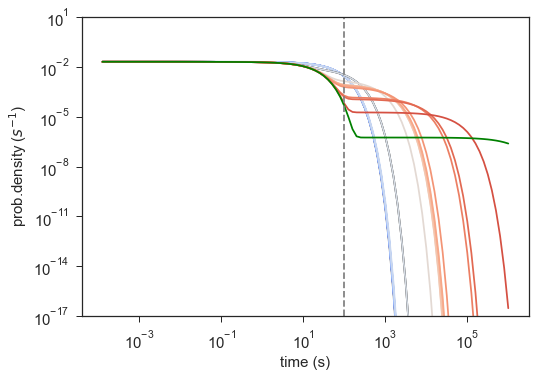

In [33]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/median_landscape_Boyle_2Dgrid.txt'
boyle_params = np.loadtxt(filename,comments='#')

sns.set_palette('coolwarm',20)



for mm1 in range(1,21):
    mismatch_positions = [i for i in range(mm1,21)]        
    dwelltime_dist, times = FRET.dwelltime_distribution(boyle_params, model_id, mismatch_positions, guide_length=20) 
    if mm1 == 11:
        plt.loglog(times, dwelltime_dist, label=str(mm1),color='black')
    if mm1 == 1:
        plt.loglog(times, dwelltime_dist, label=str(mm1),color='grey')
    else:
        plt.loglog(times, dwelltime_dist, label=str(mm1))


    
dwelltime_dist, times = FRET.dwelltime_distribution(boyle_params, model_id, mismatch_positions=[], guide_length=20) 
plt.semilogy(times, dwelltime_dist, label='on-target',color='green');
# plt.legend(fontsize=15, ncol=5)
plt.xlabel('time (s)', fontsize=15);
plt.ylabel('prob.density ($s^{-1}$)', fontsize=15);
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
# plt.xlim(0,10)
plt.ylim(10**(-17),10.0);

plt.axvline(100., color='grey',linestyle='dashed')

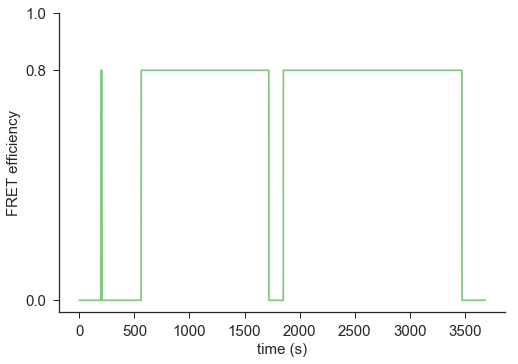

In [41]:
model_id = 'init_limit_general_energies_v2'
filename = '../data/25_10_2018/median_landscape_Boyle_2Dgrid.txt'
boyle_params = np.loadtxt(filename,comments='#')

mismatch_positions = range(11,21)
# mismatch_positions = []
filename = 'FRET_trace.txt'

concentration = 10. # concentration in nM 

FRET.simulate_FRET_trace(parameters=boyle_params, model_id=model_id,
                   mismatch_positions=mismatch_positions,
                   filename=filename,
                   concentration=concentration,
                   noise_amplitude=0.0,
                   temporal_resolution=0.1,
                    measurement_time=3600.0)


trace = np.loadtxt(filename)
time = trace[:,0]
fret = trace[:,1]
state= trace[:,2]

plt.plot(time, fret)
plt.xticks(fontsize=15)
plt.yticks([0,0.8,1.0],fontsize=15)
plt.xlabel('time (s)', fontsize=15)
plt.ylabel('FRET efficiency', fontsize=15)
sns.despine()

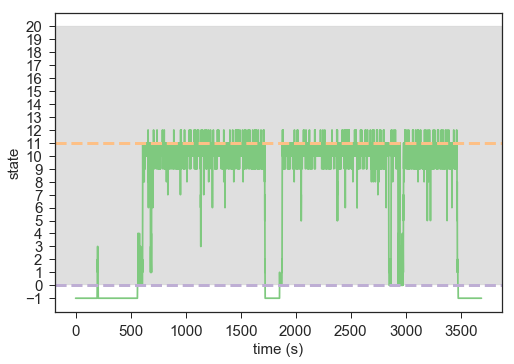

In [42]:
sns.set_palette('Accent')
plt.plot(time, trace[:,2],zorder=2);
plt.xlabel('time (s)',fontsize=15);
plt.ylabel('state',fontsize=15);

plt.axhspan(ymin=0, ymax=20, color='grey',alpha=0.25,zorder=1);
plt.axhline(0, linestyle='dashed',linewidth=3, color=sns.color_palette()[1])
plt.axhline(11, linestyle='dashed',linewidth=3, color=sns.color_palette()[2])

plt.xticks(fontsize=15);
plt.yticks(range(-1,21),fontsize=15);

In [66]:
states = trace[:,2]
print len(states[states>-1]) / float(len(states))
eps_PAM = 1.38006302
print 1.0/(1.0 + np.exp(+eps_PAM))

0.203017382748
0.200998878653


In [42]:
boyle_params

array([ 1.38006302, -4.42424257, -2.21364339,  0.3795591 , -1.3602848 ,
        0.88743426,  1.01535378, -0.51139819,  0.4353974 ,  1.5650826 ,
        4.071874  ,  1.64883024,  0.01182539, -3.50994196,  1.2955061 ,
       -0.5037462 ,  2.25881747,  2.91130477, -1.46333295,  3.30841059,
        3.8738161 ,  7.11749112,  3.31920602,  8.08630835,  7.48196576,
        5.65975068,  3.98209231,  6.78593665,  5.3408599 ,  7.58816062,
        6.35020871,  6.24198741,  5.2136907 ,  5.40963848,  6.25556617,
        5.49583164,  5.26903349,  4.546731  ,  3.63045726,  7.27758213,
        5.33729592,  3.        , -1.68461733,  2.35602586])